# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1: Data validation
The dataset contains 1500 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
- Booking id: Same as description without missing values, 1500 unique entries
- Month as Member: Same as description without missing values.
- Weight: 20 missing values, so I decided to impute the missing values with the mean value.
- Days before: Entries with “days” additionally to the number which I had to remove, so that only numeric values are left. Also, I changed the type to int.
- Day of the week: Most of the entries as abbreviation of the weekday, but I had to change the entries that were written out or entries with little mistakes.
- Time: Same as description without missing values, 2 categories.
- Category: 6 different categories. One category was named “-“ but should be named as unknown so I changed it.
- Attended: Same as description without missing values.
After the data validation, the dataset contains 1500 rows and 8 columns.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
clients= pd.read_csv('fitness_class_2212.csv')

#Imputing missing data from weight column with mean
from sklearn.impute import SimpleImputer
mean_imputer= SimpleImputer(strategy='mean')
clients['weight']=mean_imputer.fit_transform(clients[['weight']])

#Deleting 'days' and whitespaces, Converting column to int
clients['days_before']=clients['days_before'].str.strip(' days')
clients['days_before']=clients['days_before'].astype('int64')

#Adapt days of the week to first 3 letters
mapping={'Wednesday':'Wed', 'Fri.':'Fri', 'Monday':'Mon'}
clients['day_of_week']=clients['day_of_week'].replace(mapping)

#Replacing '-' with 'unknown' in column category
clients['category']=clients['category'].replace('-', 'unknown')

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


## Task 2
From the first graph, attendance total we see that only 30% of the clients attended in the sports classes. The plot on the right shows the attendance per category as well as the bar plot of the percentage of attended classes across the categories. There are smaller differences: For example, the aqua classes have higher percentage of attendance than cycling or Strength classes. The overall lowest percentage has the category unknown, but because of the fact that it is unknown we can’t say anything special about it. But in general, there aren’t big differences and for all categories the mean of attendance is about 30%.

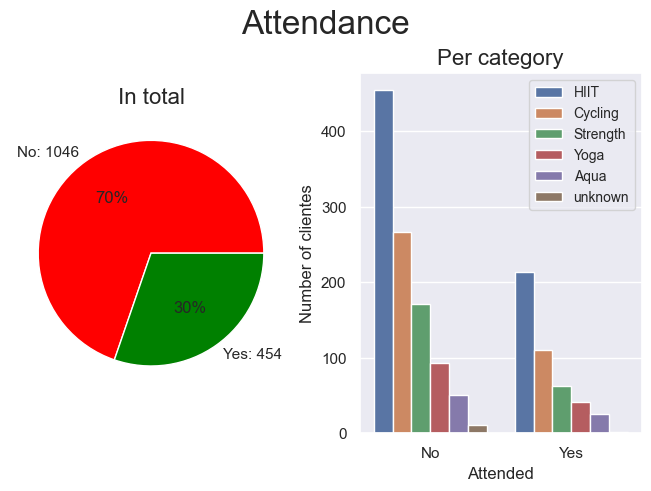

category
Aqua        0.328947
Cycling     0.292553
HIIT        0.319340
Strength    0.266094
Yoga        0.311111
unknown     0.153846
Name: attended, dtype: float64

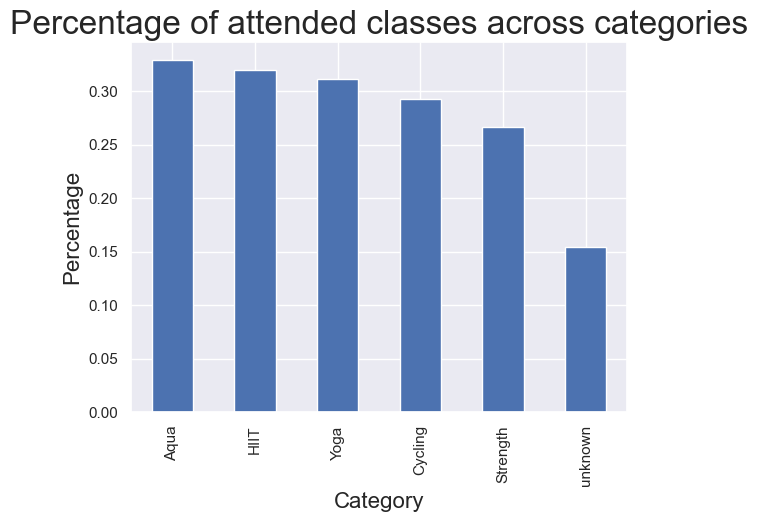

In [2]:
#Visualization distribution categories and attended
sns.set()
hue_order=clients['category'].value_counts().index
nb_att=clients['attended'].value_counts().astype(str)
fig, ax = plt.subplots(1,2, constrained_layout = True)
ax[1]=sns.countplot(data=clients, x='attended', hue='category',hue_order=hue_order)
ax[1].set_xticklabels(['No','Yes'])
ax[1].set_ylabel('Number of clientes')
ax[1].set_xlabel('Attended')
ax[0].pie(clients['attended'].value_counts(), labels=['No: '+nb_att[0], 'Yes: '+nb_att[1]], autopct='%1.f%%', colors=['red', 'green'])
plt.suptitle('Attendance', fontsize=24)
ax[0].set_title('In total', fontsize=16)
ax[1].set_title('Per category', fontsize=16)
ax[1].legend(fontsize=10)
plt.show()

Attendance_perc=clients.groupby('category')['attended'].sum()/clients.groupby('category')['attended'].count()
Attendance_perc_sort=Attendance_perc.sort_values(ascending=False)
display(Attendance_perc)

sns.set()
Attendance_perc_sort.plot(kind='bar')
plt.xlabel('Category', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Percentage of attended classes across categories', fontsize=24)
plt.show()




## Task 3
The next diagram shows the distribution of the month as member. As you can see the bins aren’t evenly spaced because there are more members with less months as member. Most members have memberships that last between 5 and 20 months. The boxplot shows the distribution and with the average of about 12 months of membership, confirms the first impression of the bar plot. I deleted the outliers to show the most important numbers in a better visualization which allowed me the high number of observations. But as you can conclude from the first plot there are also members with 35 to 150 months of membership.

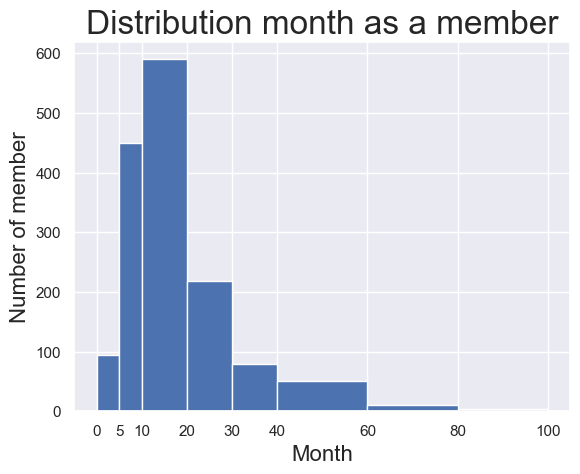

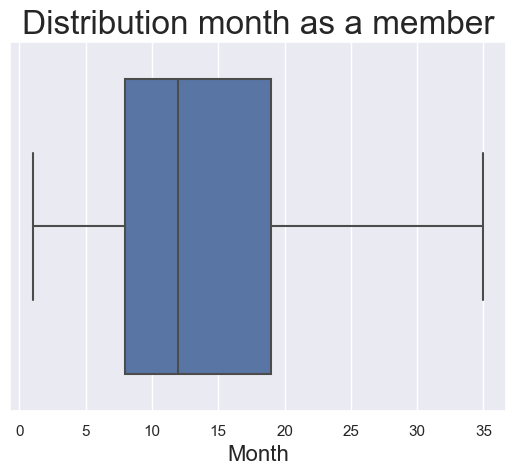

In [3]:
#Distribution months as a member: Hist
bins=[0,5,10,20,30,40,60,80,100]
plt.hist(clients['months_as_member'],bins=bins)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of member', fontsize=16)
plt.title('Distribution month as a member', fontsize=24)
plt.xticks(ticks=bins)
plt.show()

#Distribution months as a member: Boxplot without outliers
sns.boxplot(data=clients, x='months_as_member', showfliers=False)
plt.xlabel('Month', fontsize=16)
plt.title('Distribution month as a member', fontsize=24)
plt.show()


## Task 4
The comparison of the two boxplots of members who attended and those who did not attend the course shows that the group of those who did not attend have significantly shorter running memberships on average. The average duration of the memberships of the attendees is twice as high. The Pearson correlations coefficient confirms that and shows a clear positive relationship between membership duration and attendance.

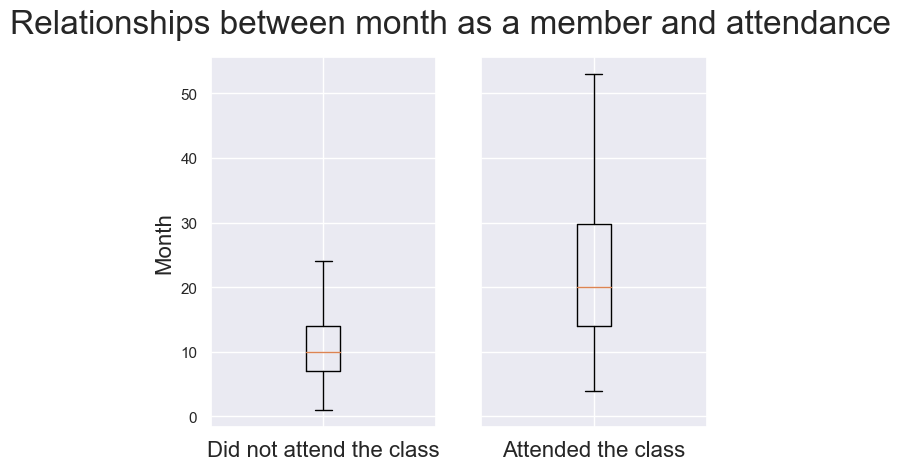

Correlation month as a member and attended class 0.4855262232752622


In [4]:
#Relationships between month as a member and attendance
no_attendance=clients[clients['attended']==0]
attendance=clients[clients['attended']==1]
fig,ax= plt.subplots(1,2, sharey=True)
ax[0].boxplot(no_attendance['months_as_member'],showfliers=False)
ax[0].set_xticklabels(['Did not attend the class'], fontsize=16)
ax[1].boxplot(attendance['months_as_member'],showfliers=False)
ax[1].set_xticklabels(['Attended the class'], fontsize=16)
ax[0].set_ylabel('Month', fontsize=16)
plt.suptitle('Relationships between month as a member and attendance', fontsize=24)
plt.show()

from scipy.stats import pearsonr
print("Correlation month as a member and attended class",pearsonr(clients['months_as_member'], clients['attended'])[0])

## Task 5

It isn't clustering because, it is used for unsupervised learning. In this case we have supervised learning because there are labels in form of the attended column. It's neither regression since there isn't a continuous variable but it contains a discrete variable which is 0 or 1. Therefore the problem could be solved with a classification model.


## Task 6
Finally, to enable model fitting, I have made the following changes:

- Remove the Place booking id column because it has unique values, so we won't use that feature.
- Convert all the categorical variables into numeric variables.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#drop id
clients=clients.drop('booking_id', axis=1)

#split label and features
from sklearn import preprocessing
y=clients['attended']
features=clients.drop(columns='attended', axis=1)

#preprocessing to get dummie df
X=pd.get_dummies(features, columns=['day_of_week', 'time','category'])
X.info()

#split dummie df in training and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create modell, fit it
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   months_as_member   1500 non-null   int64  
 1   weight             1500 non-null   float64
 2   days_before        1500 non-null   int64  
 3   day_of_week_Fri    1500 non-null   uint8  
 4   day_of_week_Mon    1500 non-null   uint8  
 5   day_of_week_Sat    1500 non-null   uint8  
 6   day_of_week_Sun    1500 non-null   uint8  
 7   day_of_week_Thu    1500 non-null   uint8  
 8   day_of_week_Tue    1500 non-null   uint8  
 9   day_of_week_Wed    1500 non-null   uint8  
 10  time_AM            1500 non-null   uint8  
 11  time_PM            1500 non-null   uint8  
 12  category_Aqua      1500 non-null   uint8  
 13  category_Cycling   1500 non-null   uint8  
 14  category_HIIT      1500 non-null   uint8  
 15  category_Strength  1500 non-null   uint8  
 16  category_Yoga      1500 

LogisticRegression()

## Task 7

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Task 8
Predicting whether a member will attend the course or not is a binary classification problem in machine learning. I am choosing the Logistic Regression model as a baseline model because it is very efficient to train and interpret. The comparison model I am choosing is the Decision Tree model because it works well with mixed data type and is less influenced by outliers.

## Task 9
*Write your description here*

In [7]:
#predict labels of test data
from sklearn.metrics import accuracy_score

y_pred_logreg= logreg.predict(X_test)
y_pred_train=logreg.predict(X_train)
print(f'AccScore logistic regression: {accuracy_score(y_test, y_pred_logreg):.3f}')

y_pred_tree= tree.predict(X_test)
y_pred_train=tree.predict(X_train)
print(f'AccScore decision tree classifier: {accuracy_score(y_test, y_pred_tree):.3f}')

AccScore logistic regression: 0.800
AccScore decision tree classifier: 0.789


## Task 10
I am choosing accuracy to evaluate the model because they are easy to interpret. Accuracy focuses on correct predictions of all predictions.

The accuracies of the Logistic Regression model and Decision Tree model are 0.80 and 0.787, meaning the Logistic Regression model predicts more correctly whether a member will a attend the course or not.

From this metric, we can conclude that the Logistic Regression model has a higher chance of that the prediction being correct.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam